In [88]:
!pip install folium

In [89]:
import re
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [90]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the block headers
block_headers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Iterate through the lines to find block headers
    for i in range(len(lines) - 2):  # Ensure we don't go out of bounds
        if (lines[i].strip()[:4].isdigit() and 
            lines[i].strip()[0] == '7'):  # Check for 4 digits starting with a 7
            # Collect the next three lines as a block header
            block_header = lines[i:i+3]
            block_headers.append(''.join(block_header))

# Print the extracted block headers
for header in block_headers:
    print(header)


7689 Check-In 07:55 Check-Out 17:28 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7697 Check-In 08:25 Check-Out 10:51 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7726 Check-In 10:35 Check-Out 10:51 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7728 Check-In 10:35 Check-Out 19:20 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7730 Check-In 10:35 Check-Out 10:51 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7733 Check-In 10:35 Check-Out 19:20 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

7734 Check-In 10:35 Check-Out 19:30 Category SEA-220-A,B DEC 2024
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S 

In [91]:
# Initialize an empty list to hold the block footers
block_footers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Iterate through the lines to find block footers
    for i in range(len(lines) - 4):  # loop condition to ensure that you can safely access the next four lines without going out of bounds
        if (lines[i].strip().startswith('00')):  # Check for starting with 00
            # Collect the next five lines as a block footer
            block_footer = lines[i:i+5]
            block_footers.append(''.join(block_footer))

# Print the extracted block footers
for footer in block_footers:
    print(footer)

002:53TL 007:59
TAFB 081:33 017:48TL
Total Credit 023:18
Carry Outs:
Date In Period Carry Out

004:46TL 006:16
TAFB 074:26 023:55TL
Total Credit 023:55
Carry Outs:
Date In Period Carry Out

004:46TL 006:16 +---------------------+
TAFB 048:16 015:23TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out

004:38TL 006:08
TAFB 080:45 022:55TL
Total Credit 023:04
Carry Outs:
Date In Period Carry Out

004:46TL 006:16
TAFB 072:16 019:58TL
Total Credit 021:23
Carry Outs:
Date In Period Carry Out

004:38TL 006:08
TAFB 080:45 022:55TL
Total Credit 023:04
Carry Outs:
Date In Period Carry Out

004:35TL 006:05
TAFB 080:55 022:52TL
Total Credit 023:07
Carry Outs:
Date In Period Carry Out

004:53TL 006:23
TAFB 078:53 021:51TL
Total Credit 022:32
Carry Outs:
Date In Period Carry Out

005:02TL 006:32
TAFB 079:57 022:40TL
Total Credit 022:51
Carry Outs:
Date In Period Carry Out

002:47TL 009:19
TAFB 074:24 017:17TL
Total Credit 021:17
Carry Outs:
Date In Period Carry Out

004:50TL 006:20
TAFB 073:3

In [92]:
# Initialize an empty list to hold the page footers
page_footers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    # Iterate through the lines to find block headers
    for i in range(len(lines) - 1):  # loop condition to ensure that you can safely access the next lines without going out of bounds
        if (lines[i].strip().startswith('https')):  # Check for starting with https
            # Collect the next two lines as a page footer
            page_footer = lines[i:i+2]
            page_footers.append(''.join(page_footer))

# Print the extracted page footers
for page_f in page_footers:
    print(page_f)

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 1 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 2 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 3 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 4 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 5 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 6 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 7 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 8 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 9 of 10

https://dalpbs.navblue.aero/webapp/ 11/11/24, 1:05 PM
Page 10 of 10



In [93]:
# Initialize lists for the two sections
flight_lines = []
layover_lines = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()

# Now, process the lines excluding block headers and footers
for line in lines:
    # Check if the line is part of block headers or footers
    if any(line in footer for footer in block_footers) or any(line in header for header in block_headers) or any(line in page_f for page_f in page_footers):
        continue  # Skip this line if it's in block headers or footers

    # Categorize the remaining lines
    first_char = line.strip()[0]
    if first_char.isalpha():  # Check if the first character is a letter
        layover_lines.append(line.strip())
    else:
        flight_lines.append(line.strip())

# Print the results
print("Lines starting with a letter:")
for line in layover_lines:
    print(line)

print("\nOther lines:")
for line in flight_lines:
    print(line)

Lines starting with a letter:
DEN 015:16 LEMERIDIEN AC HOTEL 002:48TL 004:18 |01 -- -- -- -- -- -- |
DFW 020:23 DALLAS MARRIOTT DWTN 004:30TL 007:08 |-- -- -- -- -- -- -- |
DFW 014:46 DALLAS MARRIOTT DWTN 007:37TL 011:43
LGA 016:16 GRAND HYATT 007:18TL 010:31 |-- -- -- -- -- -- -- |
LGA 011:48 MARRIOTT LGA APT 007:40TL 010:00 |-- -- -- |
DFW 013:54 DALLAS MARRIOTT DWTN 004:11TL 005:41
ORD 013:24 HYATT REGENCY O HARE 004:11TL 005:41 |-- -- -- -- -- -- 07 |
DFW 013:54 DALLAS MARRIOTT DWTN 006:26TL 009:01 |-- -- -- -- -- -- -- |
BOS 015:10 THE DAGNY BOSTON 006:41TL 009:15 |-- 09 -- -- -- -- -- |
SRQ 017:08 VOCO SARASOTA 004:38TL 007:06 |-- -- -- |
DFW 016:30 DALLAS MARRIOTT DWTN 006:58TL 009:28
BOS 012:10 THE DAGNY BOSTON 006:41TL 009:15 |-- -- -- 11 -- -- -- |
LGA 014:56 MARRIOTT LGA APT 004:20TL 010:04 +---------------------+
DFW 013:54 DALLAS MARRIOTT DWTN 004:11TL 005:41
BOS 015:10 THE DAGNY BOSTON 006:41TL 009:15 |-- -- -- -- -- -- -- |
SRQ 017:07 VOCO SARASOTA 004:38TL 007:06 |-- --

In [94]:
import re  # Import the regular expressions module

# Function to find all groups of three capitalized letters in the provided lines
def find_airport_stops(flight_lines):
    airports = []
    
    for line in flight_lines:
        # Find groups of three capitalized letters in the line
        groups = re.findall(r'\b[A-Z]{3}\b', line)
        airports.extend(groups)  # Add found groups to the airports list
    return airports

airport_stops = find_airport_stops(flight_lines)
print(airport_stops)

['SEA', 'DEN', 'DEN', 'SLC', 'SLC', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'SLC', 'SLC', 'SEA', 'SEA', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'CHS', 'CHS', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'DFW', 'DFW', 'SEA', 'SEA', 'ORD', 'ORD', 'BOS', 'BOS', 'LGA', 'LGA', 'SRQ', 'SRQ', 'LGA', 'LGA', 'ORD', 'ORD', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'OAK', 'SFO', 'SLC', 'SLC', 'DFW', 'DFW', 'LGA', 'LGA', 'ORD', 'ORD', 'SEA', 'SEA', 'SNA', 'SNA', 'MSP', 'MSP', 'ORD', 'ORD', 'LGA', 'LGA', 'IAH', 'IAH', 'MSP', 'MSP', 'SEA', 'SEA', 'SLC', 'SLC', 'SJC', 'SJC', 'SLC', 'SLC', 'IAH', 'IAH'

In [95]:
# Function to return the first three characters of each line in the provided lines
def find_first_airport_stop(layover_lines):
    airports = []
    
    for line in layover_lines:
        # Get the first three characters of the line
        first_three_chars = line[:3]  # Slicing to get the first three characters
        airports.append(first_three_chars)  # Add to the airports list
    
    return airports

airport_layovers = find_first_airport_stop(layover_lines)
print(airport_layovers)

['DEN', 'DFW', 'DFW', 'LGA', 'LGA', 'DFW', 'ORD', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'LGA', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'SRQ', 'DFW', 'BOS', 'SRQ', 'ORD', 'SFO', 'DFW', 'ORD', 'SNA', 'LGA', 'IAH', 'SJC', 'IAH', 'ORD', 'DFW', 'ORD', 'IAH', 'SNA', 'DFW', 'CHS', 'MSP', 'DEN', 'DFW', 'LGA', 'LGA', 'DFW', 'DFW', 'LGA', 'MSP', 'ORD', 'LGA', 'ORD', 'IAH', 'SLC', 'ORD', 'ORD', 'DEN', 'ORD', 'ORD', 'DEN', 'DFW', 'ORD', 'DFW', 'ORD', 'ORD', 'MCI', 'ORD', 'IAH', 'SNA', 'MCI', 'CHS', 'SBA', 'MCI', 'LGA', 'BOS', 'MCI', 'ORD', 'DFW', 'MCI', 'ORD', 'BOS', 'MCI', 'ORD', 'MSP', 'MCI', 'MSP', 'DEN', 'MCI', 'MCI', 'SJC', 'MCI', 'ORD', 'DFW', 'MCI', 'IAH', 'SNA', 'MCI', 'CHS', 'RDU', 'ORD', 'MCI', 'ORD', 'DFW', 'MCI', 'LGA', 'LGA', 'SLC', 'BUR', 'ORD', 'DFW', 'GEG', 'IAH', 'BOS', 'BOS', 'GEG', 'IAH', 'BOS', 'SFO', 'LGA', 'JFK', 'BOS']


In [96]:
from collections import Counter

In [97]:
# Count instances of each string
stops_summary = Counter(airport_stops)

# Print the summary
print(stops_summary)

Counter({'LGA': 103, 'SEA': 80, 'ORD': 72, 'DFW': 52, 'SLC': 32, 'MSP': 30, 'MCI': 30, 'BOS': 28, 'IAH': 20, 'SNA': 15, 'DEN': 10, 'SRQ': 8, 'CHS': 8, 'SJC': 4, 'SAT': 4, 'AUS': 4, 'GEG': 4, 'SFO': 3, 'ATL': 2, 'SBA': 2, 'BNA': 2, 'GRB': 2, 'RDU': 2, 'SAN': 2, 'OAK': 1, 'BUR': 1, 'JFK': 1})


In [98]:
# Get the counts sorted from highest to lowest
sorted_stops = stops_summary.most_common()

In [99]:
# Prepare data for plotting
stops_labels, stops_counts = zip(*sorted_stops)  # Unzip the sorted counts into labels and counts

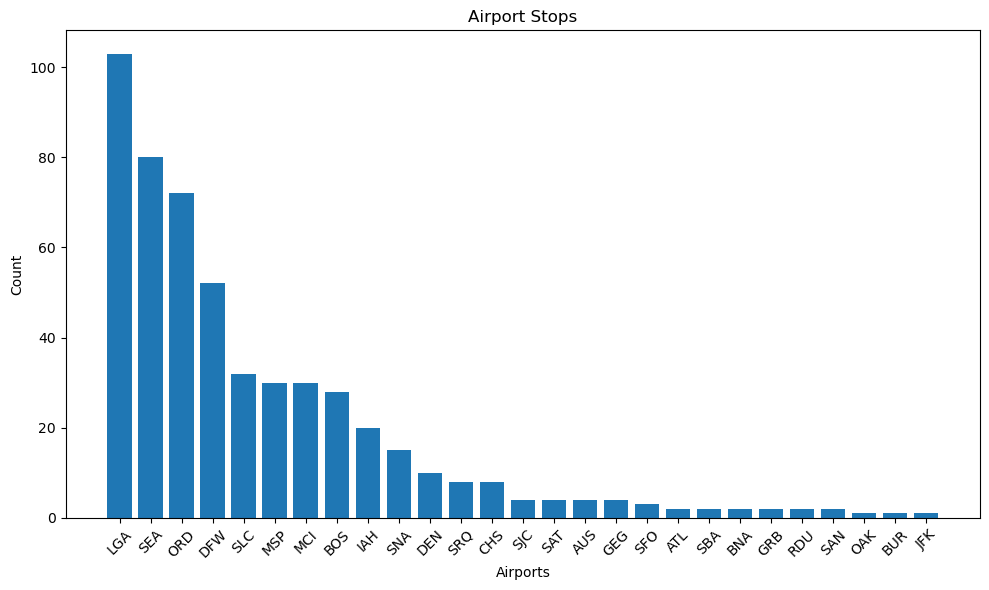

In [100]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(stops_labels, stops_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Stops')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels
# Save the plot
plt.savefig('../dist/airport_stops.png')  # Save as a PNG file
plt.show()

In [101]:
# Count instances of each string
airport_layovers_summary = Counter(airport_layovers)

# Print the summary
print(airport_layovers_summary)

Counter({'ORD': 22, 'DFW': 20, 'MCI': 14, 'LGA': 12, 'BOS': 11, 'IAH': 8, 'DEN': 5, 'SRQ': 4, 'SNA': 4, 'MSP': 4, 'CHS': 3, 'SFO': 2, 'SJC': 2, 'SLC': 2, 'GEG': 2, 'SBA': 1, 'RDU': 1, 'BUR': 1, 'JFK': 1})


In [102]:
# Get the counts sorted from highest to lowest
airport_layovers_counts = airport_layovers_summary.most_common()
# Prepare data for plotting
layover_labels, layover_counts = zip(*airport_layovers_counts)  # Unzip the sorted counts into labels and counts

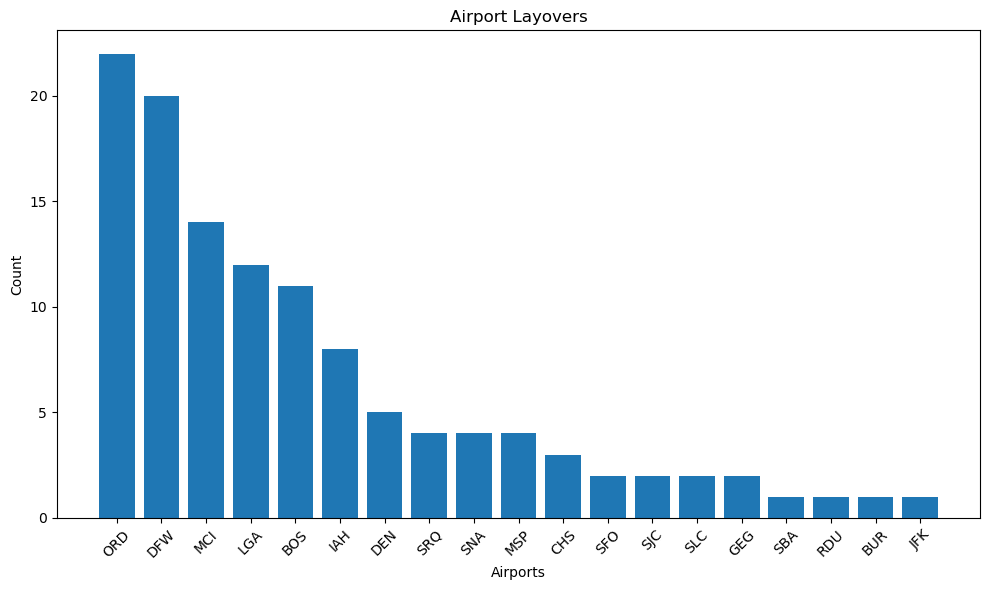

In [103]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(layover_labels, layover_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Layovers')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the plot
plt.savefig('../dist/airport_layover.png')  # Save as a PNG file
plt.show()

In [104]:
# Load the OpenFlights airports data
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airports_df = pd.read_csv(url, header=None, names=columns)

# Filter for relevant columns (IATA, Latitude, Longitude)
airport_locations = airports_df[['IATA', 'Name', 'Latitude', 'Longitude']]

# Display the first few rows
print(airport_locations.head())

  IATA                                         Name  Latitude   Longitude
0  GKA                               Goroka Airport -6.081690  145.391998
1  MAG                               Madang Airport -5.207080  145.789001
2  HGU                 Mount Hagen Kagamuga Airport -5.826790  144.296005
3  LAE                               Nadzab Airport -6.569803  146.725977
4  POM  Port Moresby Jacksons International Airport -9.443380  147.220001


In [105]:
# Convert custom airports to DataFrame
stops_airports_df = pd.DataFrame(list(stops_summary.items()), columns=['IATA', 'Count'])
print(stops_airports_df.head())

  IATA  Count
0  SEA     80
1  DEN     10
2  SLC     32
3  DFW     52
4  LGA    103


In [106]:
# Merge the custom airports with the OpenFlights data to get lat/long
stops_merged_data = pd.merge(stops_airports_df, airport_locations, on='IATA', how='left')
print(stops_merged_data.head())

  IATA  Count                                     Name   Latitude   Longitude
0  SEA     80     Seattle Tacoma International Airport  47.449001 -122.308998
1  DEN     10             Denver International Airport  39.861698 -104.672997
2  SLC     32     Salt Lake City International Airport  40.788399 -111.977997
3  DFW     52  Dallas Fort Worth International Airport  32.896801  -97.038002
4  LGA    103                       La Guardia Airport  40.777199  -73.872597


In [107]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
airport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Stops Map</b></h3>
             '''
airport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in stops_merged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 5,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(airport_map)

# Save the map to an HTML file
airport_map.save("../dist/airport_stops_map.html")

# Display the map
airport_map

In [108]:
# Convert custom airports to DataFrame
layover_airports_df = pd.DataFrame(list(airport_layovers_summary.items()), columns=['IATA', 'Count'])
print(layover_airports_df.head())

  IATA  Count
0  DEN      5
1  DFW     20
2  LGA     12
3  ORD     22
4  BOS     11


In [109]:
# Merge the custom airports with the OpenFlights data to get lat/long
layover_data = pd.merge(layover_airports_df, airport_locations, on='IATA', how='left')
print(layover_data.head())

  IATA  Count                                               Name   Latitude  \
0  DEN      5                       Denver International Airport  39.861698   
1  DFW     20            Dallas Fort Worth International Airport  32.896801   
2  LGA     12                                 La Guardia Airport  40.777199   
3  ORD     22               Chicago O'Hare International Airport  41.978600   
4  BOS     11  General Edward Lawrence Logan International Ai...  42.364300   

    Longitude  
0 -104.672997  
1  -97.038002  
2  -73.872597  
3  -87.904800  
4  -71.005203  


In [110]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
layover_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Layover Map</b></h3>
             '''
layover_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in layover_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(layover_map)

# Save the map to an HTML file
layover_map.save("../dist/airport_layover_map.html")

# Display the map
layover_map